In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [65]:
# Only run first time with new data to concatenate into one df

#!cat results/generator*/results.jsonl > results_combined.jsonl
#!wc -l results_combined.jsonl

In [8]:
data = pd.read_json("results_combined.jsonl", lines=True)

In [9]:
data.groupby("predictor").count()["id"]

predictor
claude-2         1890
gpt-3.5-turbo    1890
gpt-4            1890
Name: id, dtype: int64

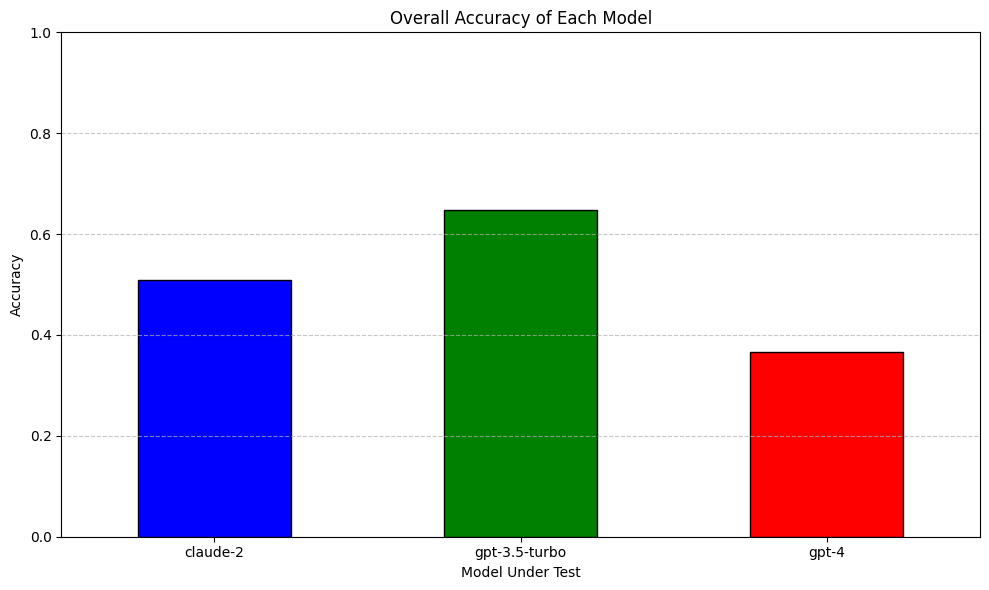

In [67]:
# Calculate overall accuracy for each LLM tested
overall_accuracies = data.groupby("predictor")["correct"].mean()

# Calculate the number of trials for each LLM
n = data.groupby("predictor").size()

# Compute the standard error for Bernoulli trials (very small, not really needed)
#standard_error = (overall_accuracies * (1 - overall_accuracies) / n) ** 0.5

# Plotting overall accuracy with error bars
plt.figure(figsize=(10, 6))
overall_accuracies.plot(kind='bar', color=['blue', 'green', 'red'], edgecolor='black')
plt.title('Overall Accuracy of Each Model')
plt.xlabel('Model Under Test')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='predictor'>

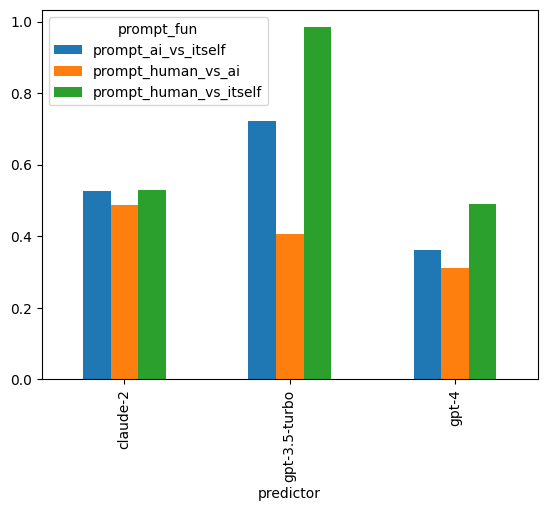

In [25]:
accuracy_by_test_type = data.groupby(['predictor', 'prompt_fun'])['correct'].mean().unstack()
accuracy_by_test_type.plot(kind='bar')

In [28]:
#data.dropna().groupby(["predictor", "prediction", "correct_prediction", ])["prediction"].agg(["count"])
data.dropna().groupby(["predictor", "prompt_fun", ])["correct"].agg(["mean"])

mean
predictor     prompt_fun                      
claude-2      prompt_ai_vs_itself     0.526003
              prompt_human_vs_ai      0.486772
              prompt_human_vs_itself  0.530928
gpt-3.5-turbo prompt_ai_vs_itself     0.722222
              prompt_human_vs_ai      0.406085
              prompt_human_vs_itself  0.984127
gpt-4         prompt_ai_vs_itself     0.361559
              prompt_human_vs_ai      0.310847
              prompt_human_vs_itself  0.489418

In [30]:
data["contains_gpt35"] = (data.generator1 == "gpt-3.5-turbo") | (data.generator2 == "gpt-3.5-turbo")

In [31]:
data.dropna().groupby(["predictor", "prompt_fun", "contains_gpt35", ])["correct"].agg(["mean"])

mean
predictor     prompt_fun             contains_gpt35          
claude-2      prompt_ai_vs_itself    False           0.594340
                                     True            0.464789
              prompt_human_vs_ai     False           0.476190
                                     True            0.497354
              prompt_human_vs_itself False           0.530928
gpt-3.5-turbo prompt_ai_vs_itself    True            0.722222
              prompt_human_vs_ai     False           0.406085
              prompt_human_vs_itself True            0.984127
gpt-4         prompt_ai_vs_itself    False           0.551630
                                     True            0.175532
              prompt_human_vs_ai     False           0.312169
                                     True            0.309524
              prompt_human_vs_itself False           0.489418

In [19]:
data.dropna().groupby(["contains_gpt35", "predictor", "prompt_fun", ])["correct"].agg(["mean", "std"])

mean       std
contains_gpt35 predictor     prompt_fun                                
False          claude-2      prompt_ai_vs_itself     0.594340  0.491793
                             prompt_human_vs_ai      0.476190  0.500095
                             prompt_human_vs_itself  0.530928  0.500334
               gpt-3.5-turbo prompt_human_vs_ai      0.406085  0.491426
               gpt-4         prompt_ai_vs_itself     0.552486  0.497926
                             prompt_human_vs_ai      0.529412  0.500979
                             prompt_human_vs_itself  0.470120  0.500104
True           claude-2      prompt_ai_vs_itself     0.464789  0.499463
                             prompt_human_vs_ai      0.497354  0.500656
               gpt-3.5-turbo prompt_ai_vs_itself     0.722222  0.448200
                             prompt_human_vs_itself  0.984127  0.125150
               gpt-4         prompt_ai_vs_itself     0.140078  0.347745
                             prompt_human_vs_ai      0.491379  0.502095

In [38]:
data.dropna()

,id,fable_id,fable1,fable2,prediction_raw,generator1,generator2,prediction,correct,predictor,prompt_fun,correct_prediction
0,757,1,"A badger, crossing a bridge over a river with ...",A hungry fox was stalking a rabbit one sunny a...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
2,759,3,"A middle-aged man, whose hair had started gray...",A fox decided to host a grand feast and invite...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
3,760,4,Two neighbours came before Zeus and asked him ...,A lazy fox spent his days sleeping in the shad...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
5,762,6,A farmer covered his wheat field with nets in ...,It was a sunny day in the forest. A flock of b...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
6,763,7,"The horse and the moose had a fight, so the ho...",A young dove wanted to find a mate. She let th...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
...,...,...,...,...,...,...,...,...,...,...,...,...
5665,374,185,"Once, a naive frog befriended a cunning snake ...",A sick bull was lying in a quiet corner of the...,"{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1
5666,375,186,"A small mouse, living comfortably in an unnoti...","""Little shrub, why donâ€™t you do as I do and ...","{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1
5667,376,187,"Once, a squirrel who had shared countless wint...","One evening, a goatherd was driving his flock ...","{""my_fable"": ""Fable2""}",gpt-4,human,fable2,0.0,gpt-4,prompt_human_vs_itself,fable1
5668,377,188,"Once upon a time, a proud lion, refusing to hu...","The lumberjack had felled an old redwood and, ...","{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1


Saved working directory and index state WIP on main: f0270e4 Add more results from gpt-4


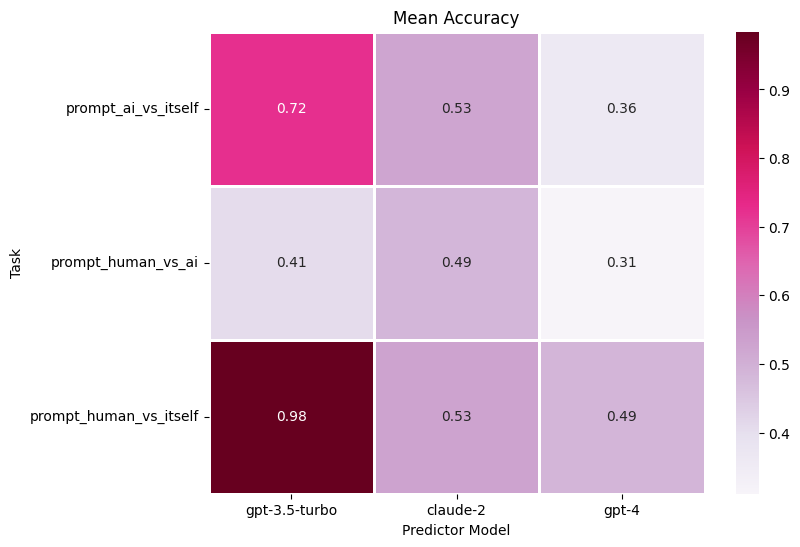

In [66]:
#import seaborn as sns

# Calculate mean accuracy
heatmap_data = data.dropna().groupby(["prompt_fun", "predictor"])["correct"].agg(["mean"]).unstack().fillna(0)
heatmap_data.columns = heatmap_data.columns.droplevel(0)

# Reorder columns in order of "model age"
column_order = ["gpt-3.5-turbo", "claude-2", "gpt-4"]
heatmap_data = heatmap_data[column_order]

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='PuRd', cbar=True, linewidths=1)
plt.title('Mean Accuracy')
plt.xlabel('Predictor Model')
plt.ylabel('Task')
plt.savefig("/Users/matthewlutz/Downloads/TuringMirror/heatmap-mean-accuracies.png", bbox_inches="tight", format="png", dpi=300)
plt.show()